In [1]:
#1. Data we are given for the "Monthly Ambulatory Visits"
months <- c('January', 'February', 'March', 'April', 'May', 'June')
visits <- c(1620, 1567, 1968, 1757, 1633, 1865)

In [2]:
# a) We are using the "Navie Forecast Method" to predict visits for "July"
naive_forecast_july <- visits[length(visits)]
print(paste("Naive forecast for July:", naive_forecast_july))

[1] "Naive forecast for July: 1865"


In [3]:
# b) We are calculating "Two-period moving average" to predict visits for "July"
two_period_moving_avg <- mean(visits[(length(visits)-1):length(visits)])
print(paste("Two-period moving average forecast for July:", two_period_moving_avg))

[1] "Two-period moving average forecast for July: 1749"


In [4]:
# c) We are calcualting "Four-period moving average" to predict visits for "July"
four_period_moving_avg <- mean(visits[(length(visits)-3):length(visits)])
four_period_moving_avg_rounded <- round(four_period_moving_avg)
print(paste("Four-period moving average forecast for July (Original Value):", four_period_moving_avg))
print(paste("Four-period moving average forecast for July (Rounded):", four_period_moving_avg_rounded))

[1] "Four-period moving average forecast for July (Original Value): 1805.75"
[1] "Four-period moving average forecast for July (Rounded): 1806"


In [5]:
#2. Data we are given for the "Monthly Patient Days"
patient_days <- c(434, 483, 412, 423, 484, 453, 433, 404, 464, 403, 452, 491)
patient_months <- c('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December')

In [6]:
# a) We are predicting "Naive Forecasts of Patient Days" specfically for "February and June"
naive_forecast_feb <- patient_days[1] # February's forecast is equal to January's actual you always take the previous data
naive_forecast_june <- patient_days[5] # June's forecast is equal to May's actual you always take the pervious data
print(paste("Naive forecast for February:", naive_forecast_feb))
print(paste("Naive forecast for June:", naive_forecast_june))

[1] "Naive forecast for February: 434"
[1] "Naive forecast for June: 484"


In [7]:
# b) We are calculating "Four-period Moving Average" specifically for next year month "January"
four_period_moving_avg_jan <- mean(patient_days[(length(patient_days)-3):length(patient_days)])
rounded_moving_avg_jan <- ceiling(four_period_moving_avg_jan)
print(paste("Four-period moving average for January:", four_period_moving_avg_jan))
print(paste("Four-period moving average for January (rounded):", rounded_moving_avg_jan))

[1] "Four-period moving average for January: 452.5"
[1] "Four-period moving average for January (rounded): 453"


In [8]:
# c) We are calcualting "Six-period Moving Average" specfically for next year month "January"
six_period_moving_avg_jan <- mean(patient_days[(length(patient_days)-5):length(patient_days)])
rounded_six_period_moving_avg_jan <- ceiling(six_period_moving_avg_jan)
print(paste("Six-period moving average for January:", six_period_moving_avg_jan))
print(paste("Six-period moving average for January (rounded):", rounded_six_period_moving_avg_jan))

[1] "Six-period moving average for January: 441.166666666667"
[1] "Six-period moving average for January (rounded): 442"


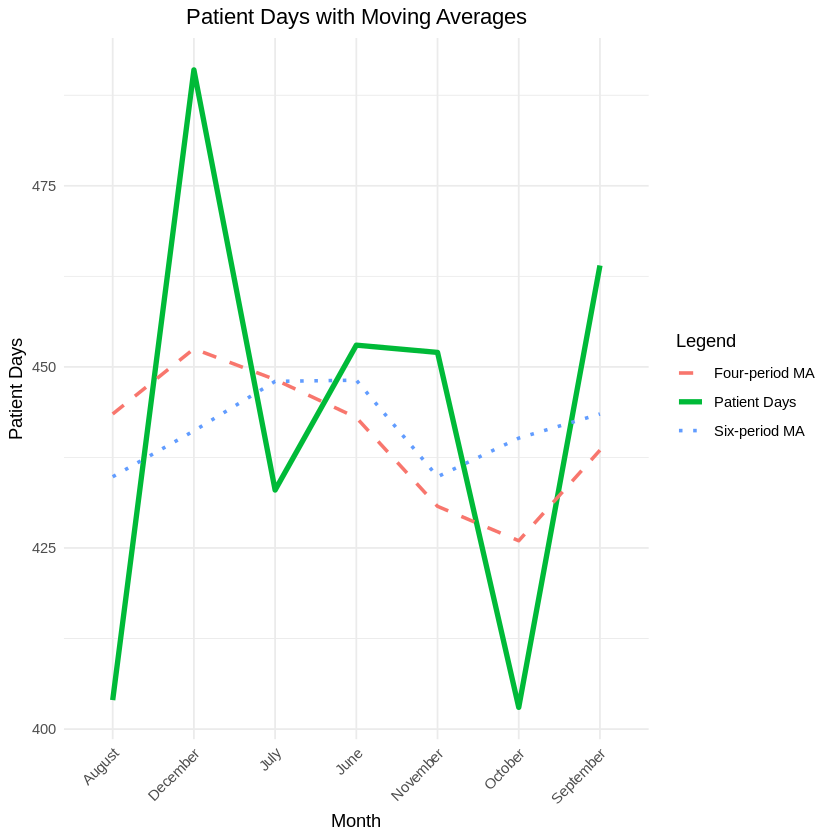

In [9]:
# d) Given Data: Monthly patient days
patient_days <- c(434, 483, 412, 423, 484, 453, 433, 404, 464, 403, 452, 491)
patient_months <- c('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December')

# Creation of the dataframe
patient_data <- data.frame(month = patient_months, patient_days = patient_days)

# Function to calculate moving average
moving_average <- function(x, n) {
  filter(x, rep(1/n, n), sides = 1)
}

# Calculating four-period and six-period moving averages
four_period_ma <- moving_average(patient_days, 4)
six_period_ma <- moving_average(patient_days, 6)

# Adding moving averages to the dataframe
patient_data$four_period_ma <- c(rep(NA, 3), four_period_ma[4:length(patient_days)])
patient_data$six_period_ma <- c(rep(NA, 5), six_period_ma[6:length(patient_days)])

# Handle missing values
patient_data <- na.omit(patient_data)

# Making the plot with a legend (key)
library(ggplot2)
ggplot(patient_data, aes(x = month, group = 1)) +
  geom_line(aes(y = patient_days, color = "Patient Days"), linewidth = 1.5) +
  geom_line(aes(y = four_period_ma, color = "Four-period MA"), linetype = "dashed", linewidth = 1) +
  geom_line(aes(y = six_period_ma, color = "Six-period MA"), linetype = "dotted", linewidth = 1) +
  labs(title = "Patient Days with Moving Averages",
       x = "Month",
       y = "Patient Days",
       color = "Legend") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(hjust = 0.5))

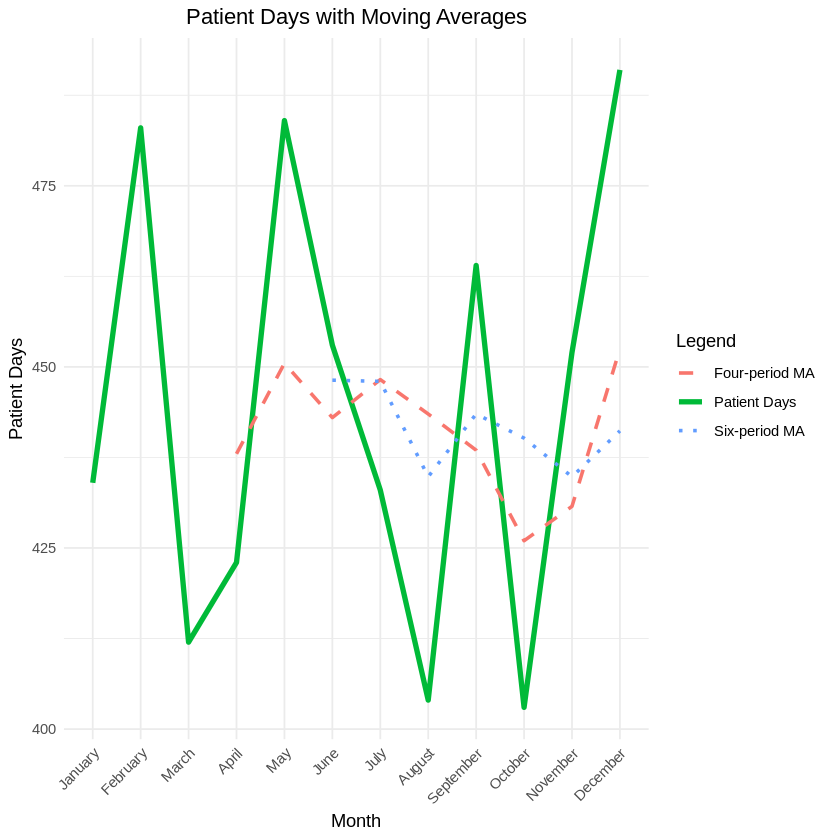

In [10]:
# d (2.0) Given Data: Monthly patient days
patient_days <- c(434, 483, 412, 423, 484, 453, 433, 404, 464, 403, 452, 491)
patient_months <- c('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December')

# Creation of the dataframe
patient_data <- data.frame(month = factor(patient_months, levels = patient_months), patient_days = patient_days)

# Function to calculate moving average
moving_average <- function(x, n) {
  stats::filter(x, rep(1/n, n), sides = 1)
}

# Calculating four-period and six-period moving averages
four_period_ma <- moving_average(patient_days, 4)
six_period_ma <- moving_average(patient_days, 6)

# Adding moving averages to the dataframe
patient_data$four_period_ma <- c(rep(NA, 3), four_period_ma[4:length(patient_days)])
patient_data$six_period_ma <- c(rep(NA, 5), six_period_ma[6:length(patient_days)])

# Making the plot with legend
library(ggplot2)
ggplot(patient_data, aes(x = month, group = 1)) +
  geom_line(aes(y = patient_days, color = "Patient Days"), linewidth = 1.5, na.rm = TRUE) +
  geom_line(aes(y = four_period_ma, color = "Four-period MA"), linetype = "dashed", linewidth = 1, na.rm = TRUE) +
  geom_line(aes(y = six_period_ma, color = "Six-period MA"), linetype = "dotted", linewidth = 1, na.rm = TRUE) +
  labs(title = "Patient Days with Moving Averages",
       x = "Month",
       y = "Patient Days",
       color = "Legend") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(hjust = 0.5)) +
  scale_x_discrete(limits = patient_months)

**Which method is a better predictor? (2 points)**

I’ve decided to include two graphs in the question because one of them seems to be missing some values. By comparing both visually, you’ll see the differences more clearly Sadia.

In my view, the four-period moving average is likely to be the better predictor. This is because it focuses on the most recent months, making it more relevant for forecasting January. The four-period moving average gives more weight to recent data, which helps in making a more accurate prediction for the upcoming period. Additionally, it aligns more closely with the average values for the months we’re examining.


In [11]:
#3. Given Data: Monthly visits
visits <- c(1620, 1567, 1968, 1757, 1633, 1865)

# Function for simple exponential smoothing
simple_exponential_smoothing <- function(series, alpha) {
  n <- length(series)
  forecast <- numeric(n + 1)  # Extend by one for the forecast of the next period
  forecast[1] <- series[1]  # The first forecast is the same as the first observation
  for (t in 2:(n + 1)) {
    if (t <= n) {
      forecast[t] <- alpha * series[t - 1] + (1 - alpha) * forecast[t - 1]
    } else {
      forecast[t] <- alpha * series[n] + (1 - alpha) * forecast[t - 1]  # Forecast for the next period
    }
  }
  return(forecast[n + 1])  # Return the forecast for the next period (July)
}

In [12]:
# a) SES Forecast for July with α = 0.3
alpha <- 0.3
ses_forecast_0_3 <- simple_exponential_smoothing(visits, alpha)
ses_forecast_0_3_rounded_up <- ceiling(ses_forecast_0_3)

print(paste("SES forecast for July with alpha=0.3:", ses_forecast_0_3))
print(paste("SES forecast for July with alpha=0.3 (rounded up):", ses_forecast_0_3_rounded_up))

[1] "SES forecast for July with alpha=0.3: 1748.36061"
[1] "SES forecast for July with alpha=0.3 (rounded up): 1749"


In [13]:
# b) SES Forecast for July with α = 0.5
alpha <- 0.5
ses_forecast_0_5 <- simple_exponential_smoothing(visits, alpha)
ses_forecast_0_5_rounded <- round(ses_forecast_0_5)
print(paste("SES forecast for July with alpha=0.5:", ses_forecast_0_5))
print(paste("SES forecast for July with alpha=0.5 (rounded):", ses_forecast_0_5_rounded))

[1] "SES forecast for July with alpha=0.5: 1782.96875"
[1] "SES forecast for July with alpha=0.5 (rounded): 1783"


In [14]:
# c) SES Forecast for July with α = 0.0
alpha <- 0.0
ses_forecast_0_0 <- simple_exponential_smoothing(visits, alpha)
print(paste("SES forecast for July with alpha=0.0 (Naive):", ses_forecast_0_0))

[1] "SES forecast for July with alpha=0.0 (Naive): 1620"


In [15]:
# d) SES Forecast for July with α = 1.0
alpha <- 1.0
ses_forecast_1_0 <- simple_exponential_smoothing(visits, alpha)
print(paste("SES forecast for July with alpha=1.0:", ses_forecast_1_0))

[1] "SES forecast for July with alpha=1.0: 1865"
